<a href="https://colab.research.google.com/github/pedroafleite/instacart-market-basket-analysis/blob/main/instacart_4_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

df_customers = pd.read_csv('/content/drive/MyDrive/instacart/df_clustered.csv')
df_customers.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Count_Orders,Average_Products_Invoice,Vegs & Fruits,Eggs & Fake Milk,Lots of Fruits,Cheese Lover,Yogurt Lovers,Customer_Category_km5,Customer_Category_km8,Customer_Category_dbsc5,Customer_Category_dbsc10
0,1.0,11.0,0.090909,0.090909,0.090909,0.363636,0.363636,3.0,0.0,0,0
1,1.0,5.0,0.400000,0.200000,0.000000,0.400000,0.000000,0.0,6.0,0,0
2,1.0,9.0,0.333333,0.222222,0.111111,0.000000,0.333333,3.0,0.0,0,0
3,1.0,13.0,0.538462,0.153846,0.076923,0.000000,0.230769,2.0,2.0,0,0
4,1.0,3.0,0.333333,0.000000,0.000000,0.666667,0.000000,0.0,6.0,0,0
5,1.0,6.0,0.166667,0.166667,0.000000,0.666667,0.000000,0.0,6.0,0,0
6,1.0,10.0,0.300000,0.200000,0.200000,0.200000,0.100000,0.0,0.0,0,0
7,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,4.0,3.0,0,0
8,1.0,5.0,0.200000,0.400000,0.000000,0.000000,0.400000,3.0,5.0,0,0
9,1.0,3.0,0.333333,0.000000,0.333333,0.000000,0.333333,3.0,4.0,0,0


In [ ]:
# Sampling dataset
# Case of classification with kmeans (clusters=5)

X_features =  df_customers[['Count_Orders', 'Average_Products_Invoice', 'Vegs & Fruits', 
                            'Eggs & Fake Milk', 'Lots of Fruits', 'Cheese Lover', 
                            'Yogurt Lovers']].to_numpy()
y_target_km5 = df_customers[['Customer_Category_km5']].to_numpy()

X_km5, X_test_km5, y_km5, y_test_km5 = train_test_split(X_features, y_target_km5, 
                                                        train_size=0.75,test_size=0.25, random_state=40)


In [ ]:
# Sampling dataset
# Case of classification with kmeans (clusters=8)

y_target_km8 = df_customers[['Customer_Category_km8']].to_numpy()

X_km8, X_test_km8, y_km8, y_test_km8 = train_test_split(X_features, y_target_km8, 
                                                        train_size=0.75,test_size=0.25, random_state=40)

In [ ]:
# Sampling dataset
# Case of classification with dbscan (min_samples=5 et eps=2.3)

y_target_dbsc5 = df_customers[['Customer_Category_dbsc5']].to_numpy()

X_dbsc5, X_test_dbsc5, y_dbsc5, y_test_dbsc5 = train_test_split(
    X_features, y_target_dbsc5, train_size=0.75, test_size=0.25, random_state=40)

In [ ]:
# Sampling dataset
# Case of classification with dbscan (min_samples=10 et eps=1.0)

y_target_dbsc10 = df_customers[['Customer_Category_dbsc10']].to_numpy()

X_dbsc10, X_test_dbsc10, y_dbsc10, y_test_dbsc10 = train_test_split(
    X_features, y_target_dbsc10, train_size=0.75, test_size=0.25, random_state=40)

# **RFC model**

Best hyperparametres on the training set: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 5}
accuracy score : 0.9925


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f128c887c88>,
      dtype=object)

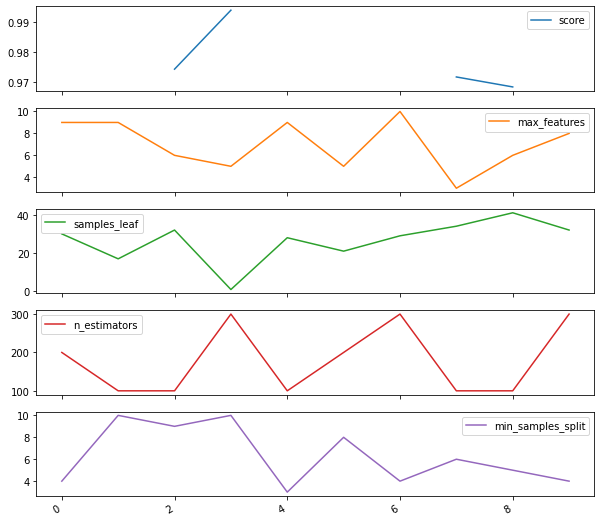

In [ ]:
# Classification using Random Forests algorithm
# (target variable: Customer_Category_km5)

rfc = RandomForestClassifier(random_state=40)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 50, 50, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
rfc_rs_km5 = RandomizedSearchCV(rfc, param_grid, cv=inner_cv, scoring='accuracy',
                            random_state=40, n_iter=10)
rfc_rs_km5.fit(X_km5, y_km5.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs_km5, X=X_km5, y=y_km5.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      rfc_rs.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs.cv_results_['mean_test_score'],
                                     rfc_rs.cv_results_['param_max_features'].data,
                                     rfc_rs.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs.cv_results_['param_n_estimators'].data,
                                     rfc_rs.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'max_features', 'samples_leaf',
                                    'n_estimators', 'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

Best hyperparametres on the training set: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 5}
accuracy score : 0.9941


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f128c2af4e0>,
      dtype=object)

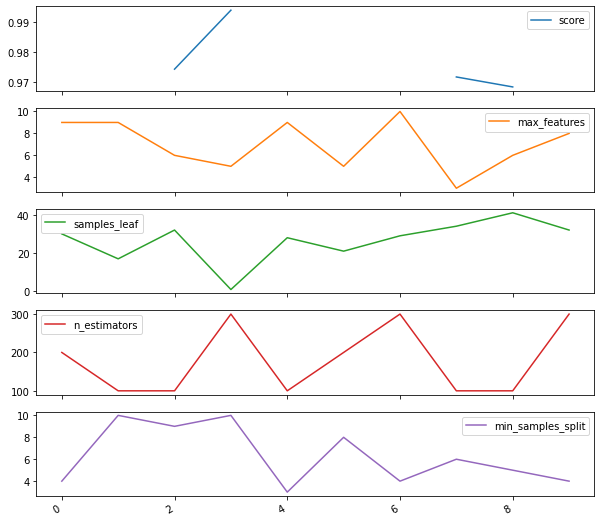

In [ ]:
# Classification using Random Forests algorithm
# (target variable: Customer_Category_km8)

rfc = RandomForestClassifier(random_state=40)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 50, 50, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
rfc_rs_km8 = RandomizedSearchCV(rfc, param_grid, cv=inner_cv, scoring='accuracy',
                            random_state=40, n_iter=10)
rfc_rs_km8.fit(X_km8, y_km8.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs_km8, X=X_km8, y=y_km8.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      rfc_rs.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs.cv_results_['mean_test_score'],
                                     rfc_rs.cv_results_['param_max_features'].data,
                                     rfc_rs.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs.cv_results_['param_n_estimators'].data,
                                     rfc_rs.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'max_features', 'samples_leaf',
                                    'n_estimators', 'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

Best hyperparametres on the training set: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 7}
accuracy score : 0.9999


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f128efc5c50>,
      dtype=object)

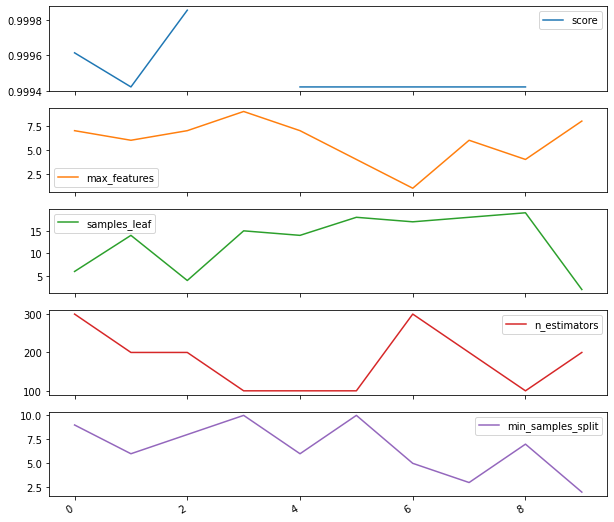

In [ ]:
# Classification using Random Forests algorithm
# (target variable: Customer_Category_dbsc5)

rfc = RandomForestClassifier(random_state=40)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 20, 20, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
rfc_rs_dbsc5 = RandomizedSearchCV(rfc, param_grid, cv=inner_cv, scoring='accuracy',
                                  n_iter=10, random_state=40)
rfc_rs_dbsc5.fit(X_dbsc5, y_dbsc5.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs_dbsc5, X=X_dbsc5, y=y_dbsc5.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      rfc_rs_dbsc5.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs_dbsc5.cv_results_['mean_test_score'],
                                     rfc_rs_dbsc5.cv_results_['param_max_features'].data,
                                     rfc_rs_dbsc5.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs_dbsc5.cv_results_['param_n_estimators'].data,
                                     rfc_rs_dbsc5.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'max_features', 'samples_leaf',
                                    'n_estimators', 'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

Best hyperparametres on the training set: {'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 7}
accuracy score : 0.9957


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f128ef34748>,
      dtype=object)

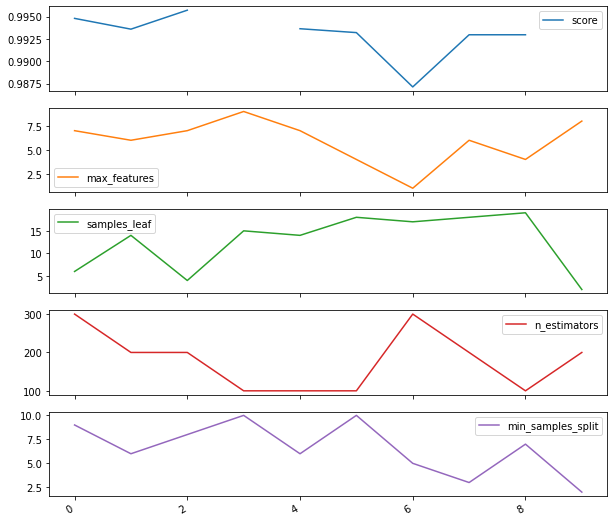

In [ ]:
# Classification using Random Forests algorithm
# (target variable: Customer_Category_dbsc10)

rfc = RandomForestClassifier(random_state=40)
param_grid = {"max_features": np.linspace(1,10,10, dtype=int),
              "min_samples_leaf": np.linspace(1, 20, 20, dtype=int),
              "min_samples_split": np.linspace(2, 10, 9, dtype=int),
              "n_estimators":[100, 200, 300]}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
inner_cv = KFold(n_splits=5, shuffle=True, random_state=40)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Non_nested parameter search and scoring
rfc_rs_dbsc10 = RandomizedSearchCV(rfc, param_grid, cv=inner_cv, scoring='accuracy',
                                  n_iter=10, random_state=40)
rfc_rs_dbsc10.fit(X_dbsc10, y_dbsc10.ravel())

# Nested CV with parameter optimization
nested_score = cross_val_score(rfc_rs_dbsc10, X=X_dbsc10, y=y_dbsc10.ravel(), cv=outer_cv)

print("Best hyperparametres on the training set:",
      rfc_rs_dbsc10.best_params_)
print("accuracy score : %.4f" % nested_score.mean())
    

rfc_rs_df=pd.DataFrame(np.transpose([rfc_rs_dbsc10.cv_results_['mean_test_score'],
                                     rfc_rs_dbsc10.cv_results_['param_max_features'].data,
                                     rfc_rs_dbsc10.cv_results_['param_min_samples_leaf'].data,
                                     rfc_rs_dbsc10.cv_results_['param_n_estimators'].data,
                                     rfc_rs_dbsc10.cv_results_['param_min_samples_split'].data]),
                           columns=['score', 'max_features', 'samples_leaf',
                                    'n_estimators', 'min_samples_split'])
rfc_rs_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Reds):
    ''' This function prints and plots a normalized confusion matrix.
  
  Parameters:
      
      cm : the confusion matix 
      classes (list): the labels to diplay on the graph
      title (string): the title of the confusion matrix plot
      
  '''

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, bbox={"pad":3, 'alpha': 0.5,"facecolor":'red'}, size=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

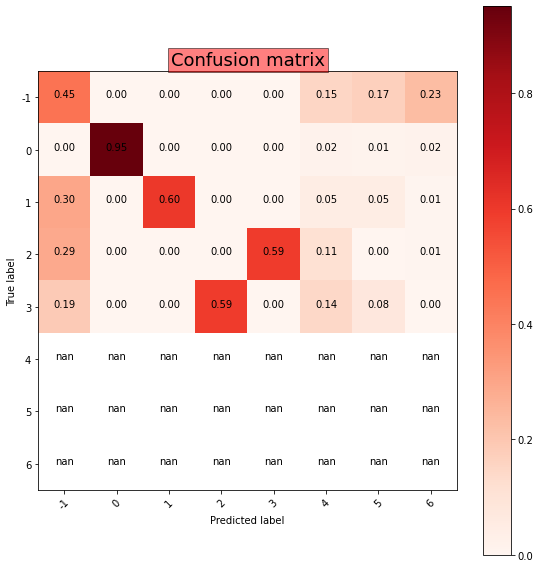

In [ ]:
# Confusion matrix of the Random Forests classifier model
# (target variable: Customer_Category_km5)

y_pred_km5 = rfc_rs_km5.predict(X_test_km5)
cnf_matrix = confusion_matrix(y_test_km5, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 7)],
                      title='Confusion matrix')

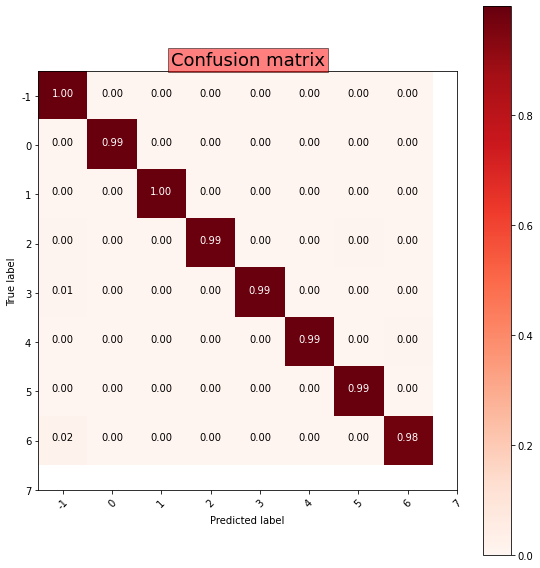

In [ ]:
# Confusion matrix of the Random Forests classifier model
# (target variable: Customer_Category_km8)

y_pred_km8 = rfc_rs_km8.predict(X_test_km8)
cnf_matrix = confusion_matrix(y_test_km8, y_pred_km8)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 8)],
                      title='Confusion matrix')

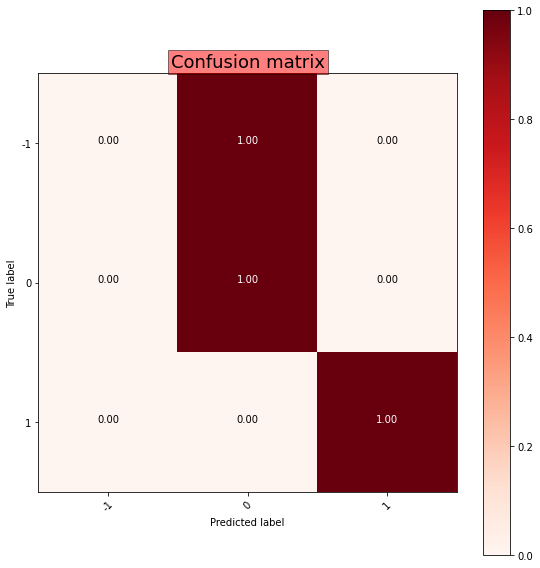

In [ ]:
# Confusion matrix of the Random Forests classifier model
# (target variable: Customer_Category_dbsc5)

y_pred_dbsc5 = rfc_rs_dbsc5.predict(X_test_dbsc5)
cnf_matrix = confusion_matrix(y_test_dbsc5, y_pred_dbsc5)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 2)],
                      title='Confusion matrix')

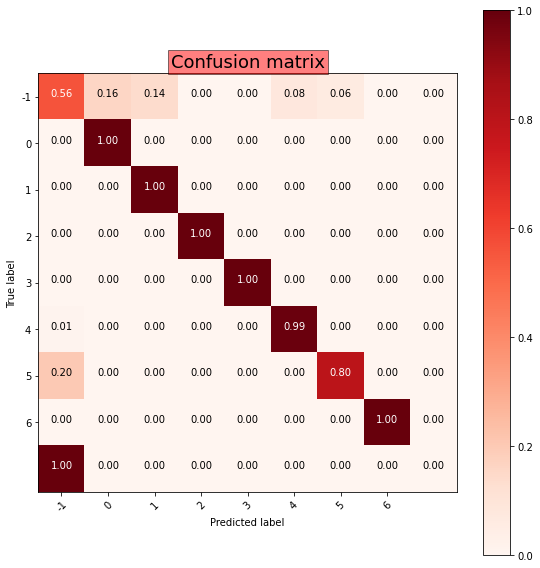

In [ ]:
# Confusion matrix of the Random Forests classifier model
# (target variable: Customer_Category_dbsc30)

y_pred_dbsc10 = rfc_rs_dbsc10.predict(X_test_dbsc10)
cnf_matrix = confusion_matrix(y_test_dbsc10, y_pred_dbsc10)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 7)],
                      title='Confusion matrix')

# **Improving Gradient Boosting model**

In [ ]:
# Gradient Boosting (target variable: Customer_Category_km13 ) with medium upsampling

df_majority = df_customers[(df_customers.Customer_Category_km13!=8.0) &
                          (df_customers.Customer_Category_km13!=9.0)]
df_cluster8 = df_customers[df_customers.Customer_Category_km13==8.0]
df_cluster9 = df_customers[df_customers.Customer_Category_km13==9.0]
df_minority = pd.concat([df_cluster8, df_cluster9])
 
# Upsampling minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=334,
                                 random_state=40) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Validation set without upsampling
X_train, X_validation, y_train, y_validation = train_test_split(
    X_km13, y_km13, test_size=0.2,train_size=0.8, random_state=40)

X = df_upsampled.as_matrix(df_upsampled.columns[0:13])
y = df_upsampled.as_matrix([df_upsampled.columns[14]])

# Training set with upsampling
X_train_ups, X_test, y_train_ups, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=40)


gbc = GradientBoostingClassifier(random_state=40, n_estimators=100, min_samples_split=8,
                                 min_samples_leaf=32, max_features=5, learning_rate=0.1)
gbc.fit(X_train_ups, y_train_ups.ravel())

y_pred = gbc.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)

print("accuracy score (with upsampling): %.4f" % accuracy)

In [ ]:
# Gradient Boosting (target variable: Customer_Category_km13 ) with hard upsampling 

df_majority = df_customers[(df_customers.Customer_Category_km13!=8.0) &
                          (df_customers.Customer_Category_km13!=9.0)]
df_cluster8 = df_customers[df_customers.Customer_Category_km13==8.0]
df_cluster9 = df_customers[df_customers.Customer_Category_km13==9.0]
df_minority = pd.concat([df_cluster8, df_cluster9])
 
# Upsampling minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=778,
                                 random_state=40)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Validation set without upsampling
X_train, X_validation, y_train, y_validation = train_test_split(
    X_km13, y_km13, test_size=0.2,train_size=0.8, random_state=40)

X = df_upsampled.as_matrix(df_upsampled.columns[0:13])
y = df_upsampled.as_matrix([df_upsampled.columns[14]])

# Training set with upsampling
X_train_ups, X_test, y_train_ups, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=40)


gbc_ups_km13 = GradientBoostingClassifier(random_state=40, n_estimators=100, min_samples_split=8,
                                 min_samples_leaf=32, max_features=5, learning_rate=0.1)
gbc_ups_km13.fit(X_train_ups, y_train_ups.ravel())

y_pred = gbc_ups_km13.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)
print("accuracy score (with upsampling): %.4f" % accuracy)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')

In [ ]:
# Gradient Boosting (target variable: Customer_Category_dbsc5 ) with medium upsampling

df_majority = df_customers[(df_customers.Customer_Category_dbsc5!=-1.0)]
df_minority = df_customers[(df_customers.Customer_Category_dbsc5==-1.0)]
 
# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=651,   
                                 random_state=40)
 
# Combine majority class with upsampled minority class 
df_upsampled_km13 = pd.concat([df_majority, df_minority_upsampled])

# Training set without upsampling
X_train, X_validation, y_train, y_validation = train_test_split(
    X_dbsc5, y_dbsc5, test_size=0.2,train_size=0.8, random_state=40)

X = df_upsampled.as_matrix(df_upsampled.columns[0:13])
y = df_upsampled.as_matrix([df_upsampled.columns[16]])

# JTraining set with upsampling
X_train_ups, X_test, y_train_ups, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=40)

gbc = GradientBoostingClassifier(random_state=40, n_estimators=100, min_samples_split=4,
                                 min_samples_leaf=3, max_features=3, learning_rate=0.1)
gbc.fit(X_train_ups, y_train_ups.ravel())

y_pred = gbc.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)

print("accuracy score (with upsampling): %.4f" % accuracy)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

In [ ]:
# Gradient Boosting (target variable: Customer_Category_dbsc5 )with hard upsampling

df_majority = df_customers[(df_customers.Customer_Category_dbsc5!=-1.0)]
df_minority = df_customers[(df_customers.Customer_Category_dbsc5==-1.0)]
 
# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=1302,
                                 random_state=40)
 
# Combine majority class with upsampled minority class
df_upsampled_dbsc5 = pd.concat([df_majority, df_minority_upsampled])

# Training set without upsampling
X_train, X_validation, y_train, y_validation = train_test_split(
    X_dbsc5, y_dbsc5, test_size=0.2,train_size=0.8, random_state=40)

X = df_upsampled_dbsc5.as_matrix(df_upsampled_dbsc5.columns[0:13])
y = df_upsampled_dbsc5.as_matrix([df_upsampled_dbsc5.columns[16]])

# training set with upsampling
X_train_ups, X_test, y_train_ups, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25, random_state=40)

gbc_ups_dbsc5 = GradientBoostingClassifier(random_state=40, n_estimators=100, min_samples_split=4,
                                 min_samples_leaf=3, max_features=3, learning_rate=0.1)
gbc_ups_dbsc5.fit(X_train_ups, y_train_ups.ravel())

y_pred = gbc_ups_dbsc5.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)

print("accuracy score (with upsampling): %.4f" % accuracy)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

In [ ]:
print(df_customers['Count_Orders'].loc[df_customers['Count_Orders']<5.0].count())
df_customers['Count_Orders'].loc[df_customers['Count_Orders']>=5.0].count()

# **Evaluation**

In [ ]:
# Evaluation of the Gradient Boosting model (target variable: Customer_Category_km13)
# with a hard upsampling, depending on the number of transactions (important (> 5) and the others)

X_count_high = df_customers.loc[df_customers['Count_Invoices']>=5.0].as_matrix(
    df_customers.columns[0:13])
X_count_low = df_customers.loc[df_customers['Count_Invoices']<5.0].as_matrix(
    df_customers.columns[0:13])

y_count_high = df_customers.loc[df_customers['Count_Invoices']>=5.0].as_matrix(
    [df_customers.columns[14]])
y_count_low = df_customers.loc[df_customers['Count_Invoices']<5.0].as_matrix(
    [df_customers.columns[14]])

# Validation set for the consumers who have made more than 5 purchases on the website
X_train, X_validation_high, y_train, y_validation_high = train_test_split(
    X_count_high, y_count_high, test_size=0.5,train_size=0.5, random_state=40)

# Validation set for the consumers who have made less than 5 purchases on the website
X_train, X_validation_low, y_train, y_validation_low = train_test_split(
    X_count_low, y_count_low, test_size=0.3,train_size=0.7, random_state=40)

y_pred_low = gbc_ups_km13.predict(X_validation_low)
accuracy_low = accuracy_score(y_validation_low, y_pred_low)

y_pred_high = gbc_ups_km13.predict(X_validation_high)
accuracy_high = accuracy_score(y_validation_high, y_pred_high)

print("accuracy score (consumers who have made less than 5 purchases on the website): %.4f" % accuracy_low)
print("accuracy score (consumers who have made more than 5 purchases on the website): %.4f" % accuracy_high)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation_low, y_pred_low)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')

cnf_matrix = confusion_matrix(y_validation_high, y_pred_high)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(13)],
                      title='Confusion matrix')

In [ ]:
# Evaluation of the Gradient Boosting model (target variable: Customer_Category_dbsc5)
# with a hard upsampling, depending on the number of transactions (important (> 5) and the others)

X_count_high = df_customers.loc[df_customers['Count_Invoices']>=5.0].as_matrix(
    df_customers.columns[0:13])
X_count_low = df_customers.loc[df_customers['Count_Invoices']<5.0].as_matrix(
    df_customers.columns[0:13])

y_count_high = df_customers.loc[df_customers['Count_Invoices']>=5.0].as_matrix(
   [df_customers.columns[16]])
y_count_low = df_customers.loc[df_customers['Count_Invoices']<5.0].as_matrix(
    [df_customers.columns[16]])

# Validation set for the consumers who have made more than 5 purchases on the website
X_train, X_validation_high, y_train, y_validation_high = train_test_split(
    X_count_high, y_count_high, test_size=0.7, train_size=0.3, random_state=40)

# Validation set for the consumers who have made less than 5 purchases on the website
X_train, X_validation_low, y_train, y_validation_low = train_test_split(
    X_count_low, y_count_low, test_size=0.3,train_size=0.7, random_state=40)

y_pred_low = gbc_ups_dbsc5.predict(X_validation_low)
accuracy_low = accuracy_score(y_validation_low, y_pred_low)

y_pred_high = gbc_ups_dbsc5.predict(X_validation_high)
accuracy_high = accuracy_score(y_validation_high, y_pred_high)

print("accuracy score (consumers who have made less than 5 purchases on the website): %.4f" % accuracy_low)
print("accuracy score (consumers who have made more than 5 purchases on the website): %.4f" % accuracy_high)

# Confusion matrix
cnf_matrix = confusion_matrix(y_validation_low, y_pred_low)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

cnf_matrix = confusion_matrix(y_validation_high, y_pred_high)
plot_confusion_matrix(cnf_matrix, classes=[i for i in range(-1, 5)],
                      title='Confusion matrix')

In [ ]:
# Evaluation of our 2 best models on the test set

y_pred_km13 = gbc_ups_km13.predict(X_test_km13)
accuracy_km13 = accuracy_score(y_test_km13, y_pred_km13)

y_pred_dbsc5 = gbc_ups_dbsc5.predict(X_test_dbsc5)
accuracy_dbsc5 = accuracy_score(y_test_dbsc5, y_pred_dbsc5)

print("accuracy score of the Gradient Boosting model (target variable:"
      "Customer_Category_km13) with a hard upsampling on the test set: %.4f" % accuracy_km13)
print("accuracy score of the Gradient Boosting model (target variable:"
      "Customer_Category_dbsc5) with a hard upsampling on the test set: %.4f" % accuracy_dbsc5)

In [ ]:
# Display the classification prediction on the test set for the model:
# Gradient Boosting (target variable:Customer_Category_km13 ) with a hard upsampling

plt.figure(figsize=(10,10))

plt.title("Comparison of predictions between our final model and true values", 
          bbox={"pad":0.5, "facecolor":'lightblue'}, size=18)
plt.scatter(y_test_km13, y_pred_km13, s=800, alpha=0.5)
plt.scatter(y_test_km13, y_test_km13, marker='^', s=300, alpha=0.6)
plt.ylabel("Prdicted cluster", size=20)
plt.xlabel("True cluster", size=20)
plt.legend(["Prediction by Gradient Boosting","True value"], fontsize=15,
           loc='upper left')
plt.show()


